In [1]:
%load_ext autoreload
%autoreload 2
from factor_processing_utils import *

In [ ]:
start_date = "2015-01-01"
end_date = "2025-07-01"
index_item = "000852.XSHG"

change_day = 20
month_day = 20
year_day = 252

stock_universe = INDEX_FIX(start_date, end_date, index_item)
stock_list = stock_universe.columns.tolist()
date_list = stock_universe.index.tolist()
factor_name = "cfoa_ttm_0"
raw_path = f"factor_lib/raw/{factor_name}_{index_item}_{start_date}_{end_date}.pkl"
neu_path = f"factor_lib/neu/{factor_name}_{index_item}_{start_date}_{end_date}.pkl"

try:
    factor_clean = pd.read_pickle(neu_path)

except:
    factor_definition = Factor("cash_flow_from_operating_activities_ttm_0") / Factor(
        "total_assets_ttm_0"
    )
    raw_factor = execute_factor(factor_definition, stock_list, start_date, end_date)
    factor_clean = preprocess_factor(raw_factor, stock_universe, index_item)
# 计算IC
ic, performance = calc_ic(factor_clean, change_day, index_item, factor_name)

{'name': 'cfoa_ttm_0', 'change_day': 20, 'IC mean': 0.0236, 'IC std': 0.0662, 'ICIR': 0.3573, 'IC>0': 0.6472, 'ABS_IC>2%': 0.7571, 't_stat': 17.9632}


 当前：2520 / 总量：2541

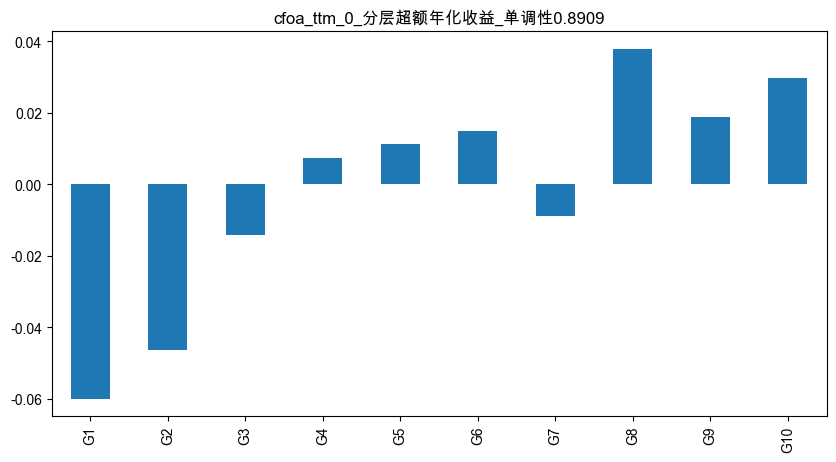

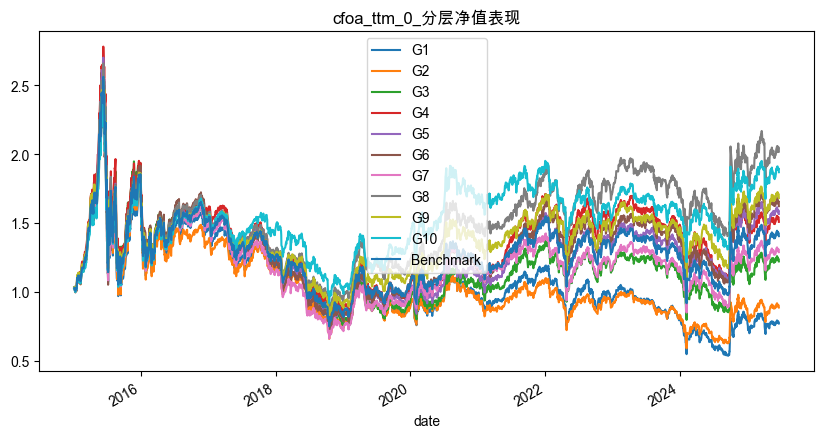

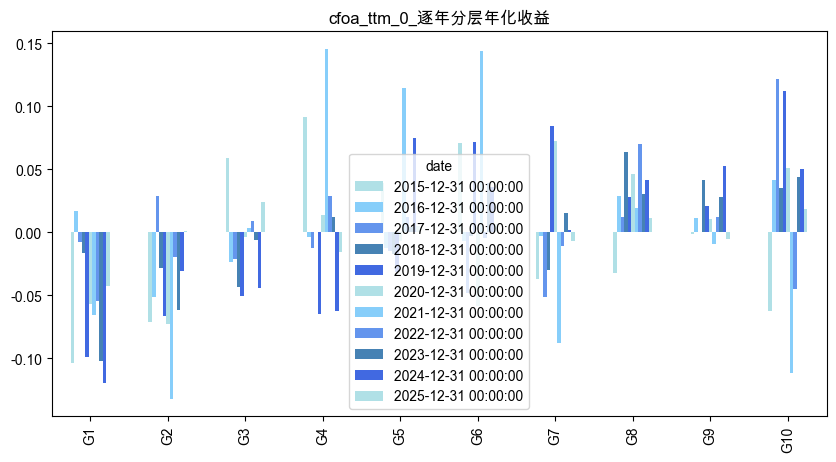

In [3]:
# 保存因子
# raw_factor.to_pickle(raw_path)
# factor_clean.to_pickle(neu_path)
# 分组回测
group_return, turnover = group_g(
    factor_clean, change_day, 10, index_item, name=factor_name, rebalance=False
)

In [4]:
turnover

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
2015-02-03,0.082353,0.142857,0.190476,0.202381,0.223529,0.261905,0.238095,0.202381,0.119048,0.094118
2015-03-10,0.142857,0.190476,0.297619,0.321429,0.250000,0.345238,0.404762,0.345238,0.226190,0.107143
2015-04-08,0.298851,0.430233,0.476744,0.441860,0.604651,0.593023,0.546512,0.476744,0.337209,0.264368
2015-05-07,0.476190,0.773810,0.761905,0.797619,0.880952,0.807229,0.821429,0.726190,0.714286,0.392857
2015-06-04,0.142857,0.216867,0.301205,0.277108,0.309524,0.397590,0.409639,0.325301,0.289157,0.238095
...,...,...,...,...,...,...,...,...,...,...
2025-01-16,0.020202,0.060606,0.111111,0.171717,0.161616,0.142857,0.151515,0.111111,0.090909,0.050505
2025-02-21,0.010101,0.040404,0.060606,0.071429,0.111111,0.101010,0.091837,0.060606,0.050505,0.020202
2025-03-21,0.020202,0.090909,0.121212,0.121212,0.111111,0.122449,0.101010,0.111111,0.080808,0.040404
2025-04-21,0.160000,0.252525,0.373737,0.474747,0.474747,0.464646,0.434343,0.373737,0.343434,0.210000


In [6]:
group_return

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,Benchmark
date,,,,,,,,,,,
2015-01-06,1.022433,1.025091,1.033696,1.029429,1.026241,1.021920,1.025471,1.030639,1.028675,1.022864,1.026646
2015-01-07,1.024493,1.023344,1.031477,1.029793,1.026138,1.020697,1.024525,1.029460,1.026663,1.022462,1.025907
2015-01-08,1.023013,1.020573,1.031201,1.028223,1.026851,1.017939,1.024902,1.030369,1.028604,1.014999,1.024665
2015-01-09,1.011280,1.010335,1.019469,1.017147,1.021148,1.008125,1.013377,1.022296,1.021512,1.006054,1.015071
2015-01-12,1.005615,1.003300,1.009339,1.008962,1.012015,0.994836,1.002136,1.017950,1.015367,0.997462,1.006689
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-13,0.772385,0.892198,1.228704,1.526458,1.575447,1.641660,1.294699,2.014979,1.697875,1.887475,1.414320
2025-06-16,0.782860,0.905197,1.241049,1.544444,1.587390,1.661048,1.310012,2.051837,1.713387,1.899921,1.430613
2025-06-17,0.779275,0.898567,1.238591,1.536224,1.586428,1.649819,1.305752,2.050556,1.711413,1.889817,1.425332


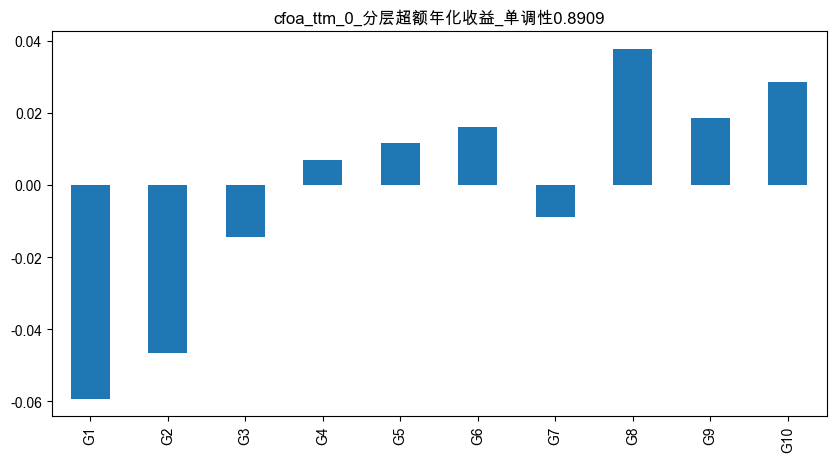

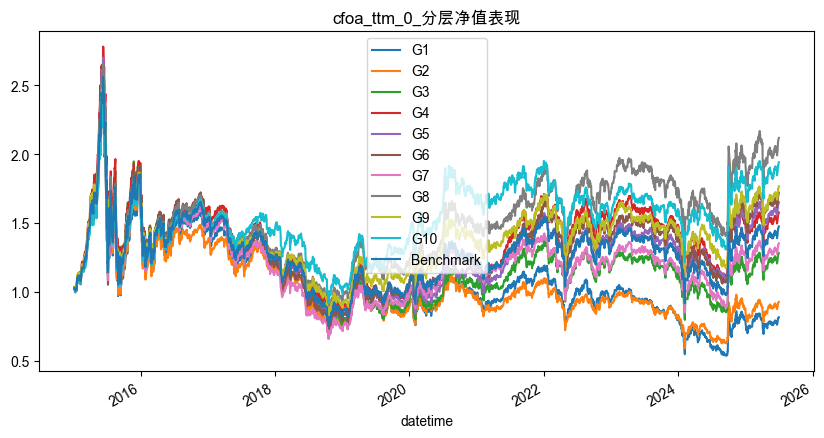

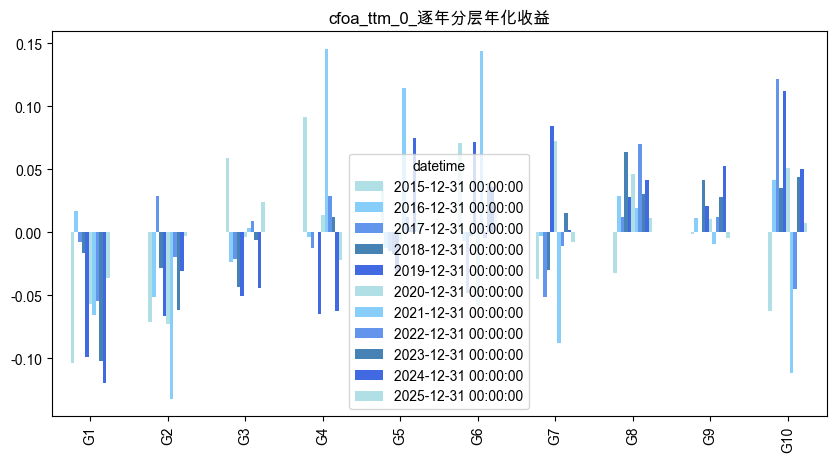

In [15]:
return_group, turnover_ratio = factor_layered_backtest(
    factor_clean, change_day, 10, index_item, name=factor_name
)

In [16]:
return_group

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,Benchmark
datetime,,,,,,,,,,,
2015-01-06,1.022433,1.025091,1.033696,1.029429,1.026241,1.021920,1.025471,1.030639,1.028675,1.022864,1.026646
2015-01-07,1.024493,1.023344,1.031477,1.029793,1.026138,1.020697,1.024525,1.029460,1.026663,1.022462,1.025907
2015-01-08,1.023013,1.020573,1.031201,1.028223,1.026851,1.017939,1.024902,1.030369,1.028604,1.014999,1.024665
2015-01-09,1.011280,1.010335,1.019469,1.017147,1.021148,1.008125,1.013377,1.022296,1.021512,1.006054,1.015071
2015-01-12,1.005615,1.003300,1.009339,1.008962,1.012015,0.994836,1.002136,1.017950,1.015367,0.997462,1.006689
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-24,0.796913,0.909219,1.256109,1.547539,1.613076,1.666125,1.319287,2.061161,1.722130,1.898170,1.440857
2025-06-25,0.805818,0.916476,1.266816,1.558306,1.636543,1.689764,1.337640,2.085500,1.745318,1.912280,1.456705
2025-06-26,0.801237,0.914357,1.266221,1.555122,1.629185,1.689091,1.331030,2.087290,1.739815,1.909882,1.453224
